[1.25] 0.08034243645985158
[1.3125] 0.08969144428411749
[1.1875] 0.07132953056886959
[1.125] 0.06280293684225795
[1.] 0.04716559582652503
[0.875] 0.0329313860788195
[0.625] 0.012015041818747097
[0.375] 0.008396545842175727
[0.9781365759724067]
[0.9781365759724067] 0.04432020504219128
[0.625] 0.012015041818747097
[0.125] 0.013610735874898045
[0.5] 1.1901705741424125e-06
[0.625] 0.012015041818747097
[0.4375] 0.005416029521727659
[0.5625] 0.00647520758423339
[0.46875] 0.003247890701680705
[0.53125] 0.003563882445429982
[0.484375] 0.0016522693664675037
[0.515625] 0.0018390036938123633
[0.4921875] 0.0007007436086080386
[0.5078125] 0.000799958380936692
[0.49609375] 0.0003797722366139204
[0.50390625] 0.00042063532777416316
[0.49804688] 5.0836401355862146e-05
[0.50195312] 6.009892917612429e-05
[0.49902344] 0.00020991716600475007
[0.49902344] 0.00020991716600475007
[0.50097656] 0.0001885764804830426
[0.50048828] 0.0001885764804830426
[0.49951172] 0.00020991716600475007
[0.50024414] 1.1901705741

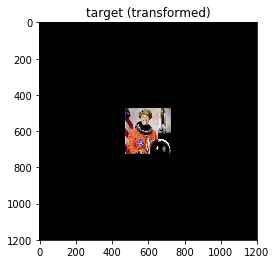

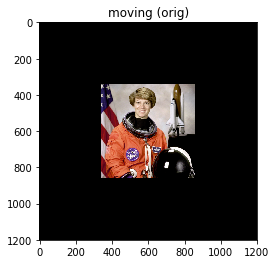

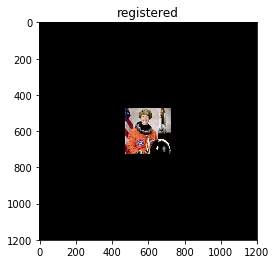

In [13]:
import sys

import matplotlib.pyplot as plt
import numpy as np
import skimage.data

# TODO: fix this to get actual directory and go back 
sys.path.append('/home/nripesh/Projects/scikit-image-register/')
import register
import utils


# image examples
im = skimage.data.astronaut()

scale_true = .5

TO_PAD_SIZE = (1200, 1200)
# assign target and moving
im_fixed = skimage.transform.rescale(
    im, scale=scale_true, clip=True, multichannel=True,
    mode='constant', anti_aliasing=True
)
im_fixed = utils.resize_image(im_fixed, TO_PAD_SIZE)
im_moving = utils.resize_image(im, TO_PAD_SIZE) / 255

options = {'maxiter': 30}
im_registered = register.im_register_scale(im_fixed, im_moving, options)


plt.figure(1)
plt.title('target (transformed)')
plt.imshow(im_fixed)
plt.figure(2)
plt.title('moving (orig)')
plt.imshow(im_moving)
plt.figure(3)
plt.title('registered')
plt.imshow(im_registered)
plt.show()

/usr/local/lib/python3.5/dist-packages/scipy/optimize/_minimize.py:502: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  RuntimeWarning)


[1.25] 0.08034243645985152 -0.018159126567994267
[1.3125] 0.08969144428411754 -0.015796250389686132
[1.1875] 0.07132953056886959 -0.010249665203287895
[1.125] 0.06280293684225792 -0.02056597695023432
[1.] 0.047165595826524985 0.012307056970609704
[0.875] 0.0329313860788195 0.023555322279316962
[0.625] 0.012015041818747104 -0.00043419952319179384
[0.375] 0.00839654584217573 -0.013990538810824144
[1.027391003645665]
[1.027391003645665] 0.050239695925043855 0.004215689742910547
[0.625] 0.012015041818747104 -0.00043419952319179384
[0.125] 0.013610735874898042 0.09298433728460936
[0.5] 1.1901705741427666e-06 0.004948882214864862
[0.625] 0.012015041818747104 -0.00043419952319179384
[0.4375] 0.005416029521727642 0.01958330961082544
[0.5625] 0.0064752075842334075 -0.046865330930558904
[0.46875] 0.003247890701680719 0.051723478921885765
[0.53125] 0.0035638824454299997 -0.05166756226456974
[0.484375] 0.0016522693664674743 -0.01605953492576461
[0.515625] 0.001839003693812392 -0.15996779265517833


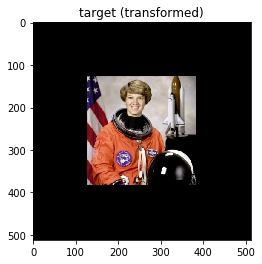

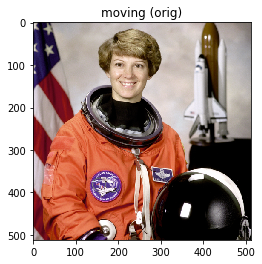

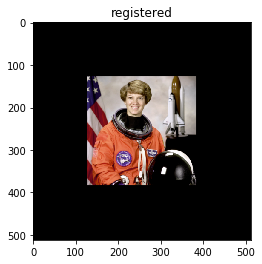

In [22]:

def ssd_im(scale_factor, im_fixed, im_moving, im_pad_size,
           xx=None, yy=None):
    if scale_factor < 0:
        scale_factor = [np.abs(np.random.randn())]
        print(scale_factor)
        
    im_moving_regis = transform.rescale(
        im_moving, scale=scale_factor, multichannel=True,
        mode='constant', anti_aliasing=True
    )
    
    im_movig_regis = resize_image(im_moving_regis, im_pad_size)
    row, col, channel = im_movig_regis.shape

    q1 = im_fixed - im_movig_regis
    ssd = np.sum(np.square(q1)) / (row * col * channel)
    
    if xx is None:
        xx, yy = np.meshgrid(
            np.arange(im_pad_size[0]), np.arange(im_pad_size[1]))

    gradient = 0
    for c in range(channel):
        # grad along single dimension should be enough
        grad = np.gradient(im_movig_regis[:, :, c])
        grad_x, grad_y = grad[0], grad[1]

        # this is specific to scaling
        grad_x = np.multiply(grad_x / scale_factor[0], xx)
        grad_y = np.multiply(grad_y / scale_factor[0], yy)

        gradient += ( 
            - 2 * np.sum(np.multiply(
                q1[:, :, c], grad_x + grad_y)) / (row * col * channel))
    
    print(scale_factor, ssd, gradient)
    return ssd, gradient

# constants
TO_PAD_SIZE = (1200, 1200)
scale_true = .5
ORIG_IM_SIZE = (im.shape[0], im.shape[1])
xx, yy = np.meshgrid(
    np.arange(TO_PAD_SIZE[0]), np.arange(TO_PAD_SIZE[1]))

# assign target and moving
im_fixed = transform.rescale(
    im, scale=scale_true, clip=True, multichannel=True,
    mode='constant', anti_aliasing=True
)
im_fixed = resize_image(im_fixed, TO_PAD_SIZE)
im_moving = resize_image(im, TO_PAD_SIZE) / 255

# random initialization and assignment
scale_init = 1.25
options = {'maxiter': 30}
error_function = lambda x: ssd_im(x, im_fixed, im_moving,
                                  TO_PAD_SIZE, xx, yy)
scale_optimized = optimize.minimize(
    error_function, scale_init, method='Nelder-Mead',
    options=options, jac=True)
print(scale_optimized)

# apply solved registration
im_registered = transform.rescale(
    im_moving, scale_optimized.x, multichannel=True,
    mode='constant', anti_aliasing=True
)
im_registered = resize_image(im_registered, TO_PAD_SIZE)

plt.figure(1)
plt.title('target (transformed)')
plt.imshow(resize_image(im_fixed, ORIG_IM_SIZE))
plt.figure(2)
plt.title('moving (orig)')
plt.imshow(resize_image(im_moving, ORIG_IM_SIZE))
plt.figure(3)
plt.title('registered')
plt.imshow(resize_image(im_registered, ORIG_IM_SIZE))
plt.show()

scale_x: 1.00, scale_y: 1.00, rotation: 0.05, shear: 0.02, t_x: 0.00, t_y: 0.00, SSD: 0.079
scale_x: 1.05, scale_y: 1.00, rotation: 0.05, shear: 0.02, t_x: 0.00, t_y: 0.00, SSD: 0.078
scale_x: 1.00, scale_y: 1.05, rotation: 0.05, shear: 0.02, t_x: 0.00, t_y: 0.00, SSD: 0.077
scale_x: 1.00, scale_y: 1.00, rotation: 0.05, shear: 0.02, t_x: 0.00, t_y: 0.00, SSD: 0.079
scale_x: 1.00, scale_y: 1.00, rotation: 0.05, shear: 0.02, t_x: 0.00, t_y: 0.00, SSD: 0.079
scale_x: 1.00, scale_y: 1.00, rotation: 0.05, shear: 0.02, t_x: 0.00, t_y: 0.00, SSD: 0.079
scale_x: 1.00, scale_y: 1.00, rotation: 0.05, shear: 0.02, t_x: 0.00, t_y: 0.00, SSD: 0.079
scale_x: 1.02, scale_y: 1.02, rotation: 0.05, shear: 0.02, t_x: 0.00, t_y: -0.00, SSD: 0.078
scale_x: 1.02, scale_y: 1.02, rotation: 0.05, shear: 0.02, t_x: 0.00, t_y: -0.00, SSD: 0.077
scale_x: 1.03, scale_y: 1.03, rotation: 0.05, shear: 0.02, t_x: -0.00, t_y: -0.00, SSD: 0.077
scale_x: 1.04, scale_y: 1.04, rotation: 0.05, shear: 0.02, t_x: -0.00, t_y: 

scale_x: 1.50, scale_y: 1.42, rotation: 0.05, shear: 0.02, t_x: -0.00, t_y: -0.00, SSD: 0.061
scale_x: 1.50, scale_y: 1.42, rotation: 0.05, shear: 0.02, t_x: -0.00, t_y: -0.00, SSD: 0.061
scale_x: 1.47, scale_y: 1.44, rotation: 0.05, shear: 0.02, t_x: -0.00, t_y: -0.00, SSD: 0.061
scale_x: 1.49, scale_y: 1.42, rotation: 0.05, shear: 0.02, t_x: -0.00, t_y: -0.00, SSD: 0.061
scale_x: 1.48, scale_y: 1.41, rotation: 0.05, shear: 0.02, t_x: -0.00, t_y: -0.00, SSD: 0.061
scale_x: 1.50, scale_y: 1.42, rotation: 0.05, shear: 0.02, t_x: -0.00, t_y: -0.00, SSD: 0.061
scale_x: 1.50, scale_y: 1.42, rotation: 0.05, shear: 0.02, t_x: -0.00, t_y: -0.00, SSD: 0.061
scale_x: 1.52, scale_y: 1.42, rotation: 0.05, shear: 0.02, t_x: -0.00, t_y: -0.00, SSD: 0.061
scale_x: 1.48, scale_y: 1.42, rotation: 0.05, shear: 0.02, t_x: -0.00, t_y: -0.00, SSD: 0.061
scale_x: 1.48, scale_y: 1.42, rotation: 0.05, shear: 0.02, t_x: -0.00, t_y: -0.00, SSD: 0.061
scale_x: 1.47, scale_y: 1.43, rotation: 0.06, shear: 0.02, t

scale_x: 1.29, scale_y: 1.58, rotation: 0.38, shear: -0.01, t_x: -0.05, t_y: 0.00, SSD: 0.019
scale_x: 1.31, scale_y: 1.62, rotation: 0.37, shear: -0.01, t_x: -0.05, t_y: 0.00, SSD: 0.020
scale_x: 1.30, scale_y: 1.60, rotation: 0.38, shear: -0.01, t_x: -0.05, t_y: 0.00, SSD: 0.019
scale_x: 1.31, scale_y: 1.61, rotation: 0.39, shear: -0.01, t_x: -0.05, t_y: 0.00, SSD: 0.018
scale_x: 1.32, scale_y: 1.63, rotation: 0.40, shear: -0.01, t_x: -0.05, t_y: 0.00, SSD: 0.019
scale_x: 1.32, scale_y: 1.57, rotation: 0.37, shear: -0.01, t_x: -0.05, t_y: 0.00, SSD: 0.020
scale_x: 1.29, scale_y: 1.60, rotation: 0.39, shear: -0.01, t_x: -0.05, t_y: 0.00, SSD: 0.018
scale_x: 1.31, scale_y: 1.55, rotation: 0.37, shear: -0.01, t_x: -0.05, t_y: 0.00, SSD: 0.020
scale_x: 1.29, scale_y: 1.60, rotation: 0.39, shear: -0.01, t_x: -0.05, t_y: 0.00, SSD: 0.018
scale_x: 1.30, scale_y: 1.60, rotation: 0.39, shear: -0.01, t_x: -0.05, t_y: 0.00, SSD: 0.018
scale_x: 1.31, scale_y: 1.62, rotation: 0.40, shear: -0.01, 

scale_x: 1.30, scale_y: 1.58, rotation: 0.40, shear: -0.01, t_x: -0.05, t_y: 0.00, SSD: 0.017
scale_x: 1.30, scale_y: 1.58, rotation: 0.40, shear: -0.01, t_x: -0.05, t_y: 0.00, SSD: 0.017
scale_x: 1.30, scale_y: 1.58, rotation: 0.40, shear: -0.01, t_x: -0.05, t_y: 0.00, SSD: 0.017
scale_x: 1.30, scale_y: 1.58, rotation: 0.40, shear: -0.01, t_x: -0.05, t_y: 0.00, SSD: 0.017
scale_x: 1.30, scale_y: 1.58, rotation: 0.40, shear: -0.01, t_x: -0.05, t_y: 0.00, SSD: 0.017
scale_x: 1.30, scale_y: 1.58, rotation: 0.40, shear: -0.01, t_x: -0.05, t_y: 0.00, SSD: 0.017
scale_x: 1.30, scale_y: 1.58, rotation: 0.40, shear: -0.01, t_x: -0.05, t_y: 0.00, SSD: 0.017
scale_x: 1.30, scale_y: 1.58, rotation: 0.40, shear: -0.01, t_x: -0.05, t_y: 0.00, SSD: 0.017
scale_x: 1.30, scale_y: 1.58, rotation: 0.40, shear: -0.01, t_x: -0.05, t_y: 0.00, SSD: 0.017
scale_x: 1.30, scale_y: 1.58, rotation: 0.40, shear: -0.01, t_x: -0.05, t_y: 0.00, SSD: 0.017
scale_x: 1.30, scale_y: 1.58, rotation: 0.40, shear: -0.01, 

scale_x: 1.29, scale_y: 1.53, rotation: 0.37, shear: 0.03, t_x: -0.04, t_y: 0.00, SSD: 0.013
scale_x: 1.29, scale_y: 1.54, rotation: 0.36, shear: 0.03, t_x: -0.04, t_y: -0.00, SSD: 0.013
scale_x: 1.29, scale_y: 1.53, rotation: 0.36, shear: 0.03, t_x: -0.04, t_y: -0.00, SSD: 0.014
scale_x: 1.30, scale_y: 1.52, rotation: 0.35, shear: 0.05, t_x: -0.04, t_y: -0.00, SSD: 0.013
scale_x: 1.30, scale_y: 1.52, rotation: 0.35, shear: 0.04, t_x: -0.04, t_y: -0.00, SSD: 0.014
scale_x: 1.29, scale_y: 1.52, rotation: 0.35, shear: 0.05, t_x: -0.04, t_y: -0.00, SSD: 0.013
scale_x: 1.29, scale_y: 1.53, rotation: 0.35, shear: 0.05, t_x: -0.04, t_y: -0.00, SSD: 0.012
scale_x: 1.29, scale_y: 1.53, rotation: 0.33, shear: 0.06, t_x: -0.03, t_y: -0.00, SSD: 0.012
scale_x: 1.29, scale_y: 1.53, rotation: 0.34, shear: 0.05, t_x: -0.04, t_y: -0.00, SSD: 0.012
scale_x: 1.29, scale_y: 1.54, rotation: 0.35, shear: 0.05, t_x: -0.04, t_y: -0.00, SSD: 0.012
scale_x: 1.29, scale_y: 1.53, rotation: 0.33, shear: 0.06, t_

scale_x: 1.30, scale_y: 1.60, rotation: 0.30, shear: 0.10, t_x: -0.03, t_y: -0.01, SSD: 0.000
scale_x: 1.30, scale_y: 1.60, rotation: 0.30, shear: 0.10, t_x: -0.03, t_y: -0.01, SSD: 0.000
scale_x: 1.31, scale_y: 1.60, rotation: 0.30, shear: 0.10, t_x: -0.03, t_y: -0.01, SSD: 0.001
scale_x: 1.30, scale_y: 1.60, rotation: 0.30, shear: 0.10, t_x: -0.03, t_y: -0.01, SSD: 0.000
scale_x: 1.30, scale_y: 1.60, rotation: 0.30, shear: 0.10, t_x: -0.03, t_y: -0.01, SSD: 0.001
scale_x: 1.30, scale_y: 1.60, rotation: 0.30, shear: 0.10, t_x: -0.03, t_y: -0.01, SSD: 0.000
scale_x: 1.30, scale_y: 1.60, rotation: 0.30, shear: 0.10, t_x: -0.03, t_y: -0.01, SSD: 0.000
scale_x: 1.30, scale_y: 1.60, rotation: 0.30, shear: 0.10, t_x: -0.03, t_y: -0.01, SSD: 0.000
scale_x: 1.30, scale_y: 1.60, rotation: 0.30, shear: 0.10, t_x: -0.03, t_y: -0.01, SSD: 0.000
scale_x: 1.30, scale_y: 1.60, rotation: 0.30, shear: 0.10, t_x: -0.03, t_y: -0.01, SSD: 0.000
scale_x: 1.30, scale_y: 1.60, rotation: 0.30, shear: 0.10, t

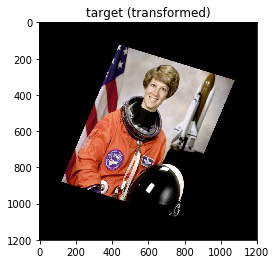

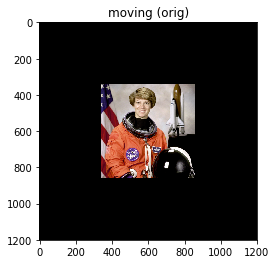

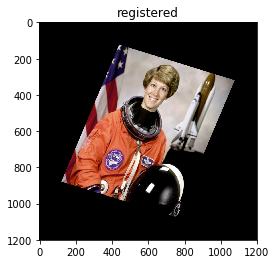

In [19]:
# now try this for any affine matrix
def apply_matrix_tform(im, tform):
    shift_y, shift_x = np.array(im.shape[:2]) / 2.
    tf_shift = transform.AffineTransform(translation=[-shift_x, -shift_y])
    tf_shift_inv = transform.AffineTransform(translation=[shift_x, shift_y])
    image_tformed = transform.warp(im, (tf_shift + (tform + tf_shift_inv)).inverse)
    return image_tformed

def ssd_affine(params, im_fixed, im_moving, im_pad_size):
    # get individual params
    scale_x, scale_y, rotation, shear, trans_x, trans_y = params

    # re-initialize bad scales
    if scale_x < 0:
        scale_x = [np.abs(np.random.randn())]
        print(scale_x)
    if scale_x < 0:
        scale_x = [np.abs(np.random.randn())]
        print(scale_x)
        
    moving_tfm = transform.AffineTransform(
        scale=(scale_x, scale_y),
        rotation=rotation,
        shear=shear,
        translation=(trans_x, trans_y))

    im_moving_regis = apply_matrix_tform(
        im_moving, moving_tfm)
    
    row, col, channel = im_moving_regis.shape

    q1 = im_fixed - im_moving_regis
    ssd = np.sum(np.square(q1)) / (row * col * channel)
    
    print('scale_x: {:2.2f}, scale_y: {:2.2f}, rotation: {:2.2f}, '.format( scale_x, scale_y, rotation) + 
          'shear: {:2.2f}, t_x: {:2.2f}, t_y: {:2.2f}, SSD: {:2.3f}'.format(shear, trans_x, trans_y, ssd))
    return ssd

# initialization
true_scale = (1.3, 1.6)
true_rotation = .3
true_shear = .1
true_translation = (0, 0)

aff_tfm = transform.AffineTransform(scale=true_scale,
                                    rotation=true_rotation,
                                    shear=true_shear,
                                    translation=true_translation)
TO_PAD_SIZE = (1200, 1200)
xx, yy = np.meshgrid(
    np.arange(TO_PAD_SIZE[0]), np.arange(TO_PAD_SIZE[1]))

im_fixed = apply_matrix_tform(resize_image(im, TO_PAD_SIZE), aff_tfm)
im_moving = resize_image(im, TO_PAD_SIZE)  / 255

# optimization
init_scale = (1., 1.)
init_rotation = .05
init_shear = 0.02
init_translation = (0, 0)
params_init = (init_scale[0], init_scale[1], init_rotation,
               init_shear, init_translation[0], init_translation[1])
options = {'maxiter': 2000}
error_function = lambda x: ssd_affine(x, im_fixed, im_moving, TO_PAD_SIZE)
affine_optimized = optimize.minimize(
    error_function, params_init, method='Nelder-Mead',
    options=options, jac=False)
print(affine_optimized)

# apply solved registration
regis_tfm = transform.AffineTransform(
    scale=(affine_optimized.x[0], affine_optimized.x[1]),
    rotation=affine_optimized.x[2],
    shear=affine_optimized.x[3],
    translation=(affine_optimized.x[4], affine_optimized.x[5]))
im_registered = apply_matrix_tform(
        im_moving, regis_tfm)

plt.figure(1)
plt.title('target (transformed)')
plt.imshow(im_fixed)
plt.figure(2)
plt.title('moving (orig)')
plt.imshow(im_moving)
plt.figure(3)
plt.title('registered')
plt.imshow(im_registered)
plt.show()

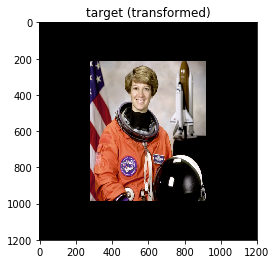

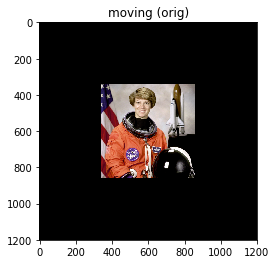

1.0

In [20]:

init_scale = (1.25, 1.5)
init_rotation = 0
init_shear = 0
init_translation = (0, 0)

aff_tfm = transform.AffineTransform(scale=init_scale,
                                    rotation=init_rotation,
                                    shear=init_shear,
                                    translation=init_translation)

im_fixed = apply_matrix_tform(resize_image(im, TO_PAD_SIZE), aff_tfm)
im_moving = resize_image(im, TO_PAD_SIZE)  / 255

plt.figure(1)
plt.title('target (transformed)')
plt.imshow(im_fixed)
plt.figure(2)
plt.title('moving (orig)')
plt.imshow(im_moving)
plt.show()

im_moving.max()